# Mentor-Mentee Matching Coefficient (3MC)

> 3MC is used to quantify how a certain mentor matches with a mentee. 

A simple feedforward neural network was deployed to find out the pattern between mentee's surveyed response and his performance (for here, it is their pitch score). We definitely should include other mentee's information like how much investments they raised, how many investors, number of patent technology, number of patent citations, and etc. Also,  

As there are more available cleaned data for us, our model will be tested and trained against the newer data. 

Definitely this model is only a **proof of concept** since we only use mentee's surveyed data to predict their pitch performance. 

Proposed idea to improve: 

    1) Include the specific mentor and mentee pairs 
    2) Use mentor's feedback to help predict mentee's performance (i.e. the sentiment analysis with NLP)


In [1]:
import keras 
import tensorflow as tf 

# config tensorflow to og_device_placement and soft placement

config = tf.ConfigProto(log_device_placement=True, allow_soft_placement=True)

sess = tf.Session(config = config)
### adding output=None function
print(sess)



Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')


with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

import keras

import tensorflow as tf

config = tf.Session(config = tf.ConfigProto(log_device_placement=True))

In [3]:
import warnings


# Supress warnings
# when we use GridSearchCV and KerasRegressor

In [4]:
import sklearn as sk
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [6]:
import tensorflow as tf


In [7]:
import pandas as pd

In [8]:
import keras
# from keras.datasets import mnist 
#MNIST dataset Handwritten dataset, to recognize the number
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras import backend as K
from keras.layers import Activation, LeakyReLU
from keras.layers.advanced_activations import PReLU

from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

In [9]:
import datetime as dt

Scrip starts at in GMT

In [10]:
a = dt.datetime.now()
print("%s/%s/%s %s:%s GMT" % (a.year, a.month, a.day, a.hour, a.minute))

2018/8/14 0:15 GMT


In [11]:
seed = 123
np.random.seed(seed)


Connect to AWS s3

> "aws configure" in terminal with your rootkey.csv (access key, private key)

In [12]:
# Access AWS S3

import boto3

s3 = boto3.client('s3')
resource = boto3.resource('s3')

View our buckets in AWS S3

In [13]:
for bucket in resource.buckets.all():
    print(bucket)

s3.Bucket(name='aws-logs-179767428070-us-west-1')
s3.Bucket(name='devsparkcal')
s3.Bucket(name='kicsv-analysis')
s3.Bucket(name='kicsv-mentordb')
s3.Bucket(name='kicsv-portalsystem')
s3.Bucket(name='kicsv-regcomp')
s3.Bucket(name='kicsv-website')


In [14]:
data = s3.get_object(Bucket="devsparkcal", 
                     Key="3MC20187302311/part-00000-tid-5106720104635993564-0485fe8d-702e-4d6b-9e5d-0997ee09f693-3773-c000.csv")



Read data object as pandas dataframe

In [15]:
df = pd.read_csv(data['Body'])
# df.columns = ['Mentor', 'Company', 'r', 'theta', 'Y']

In [16]:
df = df.sort_values(by='Company')

In [17]:
x, X, Y = df[df.columns[0:-1]].values, df[df.columns[2:-1]].values, df[df.columns[-1]].values

Split data into training set and testing set (80% training, 20% test)

X only contain columns of r, $\theta$


In [18]:
# Splitting training set and testing set
Xtrain, Xtest, Ytrain, Ytest = sk.model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 1)

Create dummy variables for categorical data, mentors and companies for our df2, another data frame

In [19]:
# use get_dummies to produce dummy variables


df1 = df

m_gd = pd.get_dummies(df1['Mentor'], prefix = 'Mentor')

# from dummy to number
m_gd.idxmax(axis=1)


c_gd = pd.get_dummies(df1['Company'], prefix = 'Company')
c_gd.idxmax(axis=1)

df2 = pd.concat([df1, m_gd, c_gd], axis = 1)


# m_le = LabelEncoder()
# c_le = LabelEncoder()
# Company_enc = LabelEncoder()

# df1['Mentor'] = m_le.fit_transform(df1['Mentor'])
# df1['Company'] =c_le.fit_transform(df1['Company'])



In [20]:
temp = df2['Y']
collist = df2.columns.tolist()
collist = collist[5:]+collist[2:5]
df2 = df2[collist]

In [21]:
df2.head() # successfully convert categorical data to dummy variable and Y is on the back

,Mentor_Allen Malaki,Mentor_Arnaud Glatron,Mentor_Bumsoo Kim,Mentor_Cirrus Shakeri,Mentor_Crispin Read,Mentor_David Barron,Mentor_Jaap Suermondt,Mentor_Jason Kim,Mentor_Jean-Claude Janqua,Mentor_John Schlesinger,...,Company_Runner's high,Company_SCG,Company_SPRYFIT,Company_Taggle,Company_The Alpha Labs,Company_VisualCamp,Company_WhaTap Labs,r,theta,Y
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.376972,46.286326,0.66
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.409992,44.900300,0.66
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.455233,43.151550,0.66
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.984023,37.702905,0.66
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.602774,46.224893,0.66


In [22]:
dataX, dataY = df2[df2.columns[0:-1]].values, df2['Y'].values

In [23]:
xtrain, xtest, ytrain, ytest = sk.model_selection.train_test_split(dataX,dataY, test_size = 0.2, random_state = 1)

In [24]:
# our training set dimension

xtrain.shape


(84, 36)

In [25]:
def baseline_model():
	# create baseline model, with 1 input layer, 1 output layer
    model =Sequential()
    model.add(Dense(72, input_dim=36, use_bias=True, 
                    kernel_initializer='normal', activation='relu'))
    # act = keras.layers.advanced_activations.PReLU(init='zero', weights=None) # using PReLU
    # model.add(act)
    model.add(Dense(1, kernel_initializer='normal'))
    act = keras.layers.PReLU(alpha_initializer='zeros',
                             alpha_regularizer=None, 
                             alpha_constraint=None, shared_axes=None)
    model.add(act)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [26]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
# keras models can be used in scikit learn by wrapping them with Keras classifier or keras regressor class.
# To use these wrappers you must define a function that creates and returns your keras sequential model, then pass this function to the builf_fn argument when constructing kerasclassifier/kerasregressor
model = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=10, verbose=0)
estimators.append(('mlp', model))
pipeline_baseline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline_baseline, xtrain, ytrain, cv=kfold)
print("The model is: %.8f (%.8f) MSE" % (results.mean(), results.std()))

# 0.00733066 (0.00476616) for no dummies, just r and theta baseline

The model is: 0.00241493 (0.00241742) MSE


In [27]:
# Set parameters for our neural network and train our NN with X and Y
# nb_epoch = 100, verbose = 0, batch_size = 5, build_fn=larger_PReLU_adadelta_model
pipeline_baseline.set_params().fit(xtrain,ytrain)
#nb_epoch = 100, verbose = 0, batch_size = 5, build_fn=larger_PReLU_adadelta_model
prediction_baseline = pipeline_baseline.predict(xtest)
prediction_baseline

array([ 0.75444496,  0.79143214,  0.6086123 ,  0.69081163,  0.62373579,
        0.82630593,  0.76187342,  0.83547586,  0.69479567,  0.79048502,
        0.49825433,  0.79823649,  0.71325451,  0.73181409,  0.81936258,
        0.83466786,  0.80761892,  0.80919814,  0.81655931,  0.74332994,
        0.88429785,  0.68295002], dtype=float32)

Using our derived objective function as activation function for input layer,

<center>
f(r,$\theta$) = 2r sin($\theta$ - $\pi$/4) in radian </center>

In [28]:
# Create own custom activation function


def custom_activation(x):
    # print(type(x)) # use to debug
    return (2*x*K.sin(x*180/math.pi-math.pi/4)) # in rad, changed from sin to cos

get_custom_objects().update({'custom_activation': Activation(custom_activation)})



Since Keras doesn't have a built-in Huber Loss, so we will be creating the loss in a robust way with tensorflow backend.

$$L(y-\hat{y}) = \begin{cases} \frac{1}{2}(y-\hat{y})^2 & if &| y-\hat{y} | \leq \delta \\
                               \delta |y-\hat{y}| -\frac{1}{2} \delta^2 & o.w. \\
                               \end{cases}$$


In [29]:
def huber_loss(y_true, y_pred, clip_delta = 1.0):
    error = y_true -y_pred
    cond = K.abs(error)<clip_delta
    
    squared_loss = 0.5*K.square(error)
    
    linear_loss = clip_delta*(K.abs(error)-0.5*clip_delta)
    
    return tf.where(cond, squared_loss, linear_loss)


def huber_loss_mean(y_true, y_pred, clip_delta=1.0):
    return K.mean(huber_loss(y_true, y_pred, clip_delta))



We are including parameters that we want to consider in GridSearch.

GridSearch essentially is just **trying every single combination of parameters. Thus, as we have more parameters, it takes more time to tune our NN.**

Also, in this script we didn't make any grid search Neuron1, Neuron2 (number of units for input layer and Hidden layer respectively); I expect our model's performance will be underperforming. The GridSearchCV runtime grows exponentially when we include more and new parameters. 

There are some algorithm and software out there to speed up the process of hyperparameter tuning. And we will be using hyperas, hyperopt to find our actual parameter for our model (refer to Keras-kopt-3MCNet-two-variables-final.ipynb and Keras-kopt-3MCNet-four-variables-final.ipynb).

In [30]:
optimizer = ['adam','adadelta']
loss = ['mean_squared_error', huber_loss] 
metrics = ['mse'] # added huber_loss_mean
activation = ['custom_activation','relu']
# Neuron1 = [2,4,5,6,9,18,36,72]
# Neuron2 = [1,2,4,16,32,64]
batch_size = [5,10,15, 100]
epochs = [50,100,200]

This is a general architecture that our gridsearch will use

As we have more time (our later version of Portal system), we can also have a changing architecture that we can tune our model with.

In [31]:
# Developing the framework for gridsearch in order for Hyperparameter tuning

def genModel(optimizer = 'adadelta', loss = 'mean_squared_error', activation = 'relu', ouput = None):

    model = Sequential()
    model.add(Dense(72, input_dim = 36, kernel_initializer = 'normal', use_bias=True,
                      activation = activation,bias_initializer="zeros")) 
    
    model.add(Dense(36, kernel_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                   activity_regularizer = keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
    
    act = keras.layers.PReLU(alpha_initializer='zeros', 
                             alpha_regularizer=None, 
                             alpha_constraint=None, shared_axes=None)

    model.add(act)
    
    model.add(Dense(1, kernel_initializer= "normal", use_bias=True)) 
    
    model.compile(loss = loss, optimizer = optimizer, metrics = ['mse'])  #loss = loss, metrics = metrics

    # out = model.fit(X_train, Y_train, batch_size = params['batch_size'], epochs=params['epochs'], verbose = 0, validation_data = [X_test, Y_test])

    return model #out,

In [32]:
# Compile our parameters list into a dictionary

param_grid = dict(optimizer=optimizer, loss=loss, activation=activation,
                  batch_size=batch_size, epochs=epochs)


In [33]:
# Use Keras Regressor to wrap around our genModel, and additional parameters like epochs, batch_size
model = KerasRegressor(build_fn=genModel, epochs=epochs, batch_size=batch_size, verbose=0)


In [34]:


# Grid search is bascically search thru all combinations of parameters
grid = GridSearchCV(estimator = model, param_grid = param_grid,
                    n_jobs=1, scoring =  'neg_mean_squared_error') 
#scoring is subject to change, scoring = mean_squared_error
# n_jobs =-1?  the number of jobs is set to the number of cores. 1> 1 core 

In [35]:
# Now we fit out grid into our training set (r, theta, Mentor, Company)
# and supress the warning notification

### This will take around 50-60 minutes on GPU

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    grid_result = grid.fit(xtrain,ytrain)

In [36]:
# summarize results


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.002422 using {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam', 'activation': 'relu', 'loss': 'mean_squared_error'}
-0.287609 (0.191760) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adam', 'activation': 'custom_activation', 'loss': 'mean_squared_error'}
-0.737504 (0.211124) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adadelta', 'activation': 'custom_activation', 'loss': 'mean_squared_error'}
-0.071169 (0.002445) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adam', 'activation': 'custom_activation', 'loss': <function huber_loss at 0x7fe5fe132268>}
-0.644991 (0.408745) with: {'batch_size': 5, 'epochs': 50, 'optimizer': 'adadelta', 'activation': 'custom_activation', 'loss': <function huber_loss at 0x7fe5fe132268>}
-0.025302 (0.003712) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam', 'activation': 'custom_activation', 'loss': 'mean_squared_error'}
-0.317611 (0.158788) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adadelta', 'activation': '

In [37]:

grid_result.best_params_

{'activation': 'relu',
 'batch_size': 5,
 'epochs': 100,
 'loss': 'mean_squared_error',
 'optimizer': 'adam'}

After fitting our training set to our grid, this is our best parameter

In [38]:

bestParams = grid_result.best_params_


bestParams

{'activation': 'relu',
 'batch_size': 5,
 'epochs': 100,
 'loss': 'mean_squared_error',
 'optimizer': 'adam'}

It turns out that our custom activation doesn't perform well.

As I was looking at the archecture, in order to better use (r,theta) data, we should create a performance network before feeding into our 3MCNet with mentor-mentee pair (similar with Recurrent Neural Network).




In [39]:
def bestModel():

    model = Sequential()
    model.add(Dense(36, input_dim =36, kernel_initializer = 'normal', 
                    activation = bestParams['activation'], bias_initializer="zeros")) 
    
    
    
    # act = keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)
    act = keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None,
                             alpha_constraint=None, shared_axes=None)
    
    model.add(Dense(18))
    model.add(act)
    model.add(Dense(1, kernel_initializer= "normal")) 
    model.compile(loss = bestParams['loss'], optimizer = bestParams['optimizer'],
                  metrics = ['mse'])   # bestParams['metrics']

        #loss = loss, metrics = metrics

        # out = model.fit(X_train, Y_train, batch_size = params['batch_size'], epochs=params['epochs'], verbose = 0, validation_data = [X_test, Y_test])

    return model

In [40]:
# Establish data pipeline for estmators

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=bestModel, epochs=bestParams['epochs'],
                                         batch_size=bestParams['batch_size'], verbose=0)))
pipeline_bestModel = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline_bestModel, xtrain, ytrain, cv=kfold)
print("The model is: %.8f (%.8f) MSE" % (results.mean(), results.std()))

The model is: 0.00161501 (0.00196940) MSE


In [41]:
pipeline_bestModel.set_params().fit(xtrain,ytrain)

prediction_bestModel = pipeline_bestModel.predict(xtest)


In [42]:
prediction_bestModel

array([ 0.76771015,  0.79002774,  0.73537511,  0.71198994,  0.74494666,
        0.77739334,  0.59973699,  0.82447535,  0.69918323,  0.79953891,
        0.73943156,  0.80039287,  0.71017653,  0.70341617,  0.75938088,
        0.80699372,  0.80872113,  0.80988944,  0.80982351,  0.7149418 ,
        0.84071088,  0.8509348 ], dtype=float32)

In [43]:
prediction_baseline

array([ 0.75444496,  0.79143214,  0.6086123 ,  0.69081163,  0.62373579,
        0.82630593,  0.76187342,  0.83547586,  0.69479567,  0.79048502,
        0.49825433,  0.79823649,  0.71325451,  0.73181409,  0.81936258,
        0.83466786,  0.80761892,  0.80919814,  0.81655931,  0.74332994,
        0.88429785,  0.68295002], dtype=float32)

In [44]:
Y

array([ 0.66      ,  0.66      ,  0.66      ,  0.66      ,  0.66      ,
        0.69714286,  0.69714286,  0.69714286,  0.69714286,  0.69714286,
        0.69714286,  0.81714286,  0.75      ,  0.81714286,  0.81714286,
        0.75      ,  0.75      ,  0.81714286,  0.81714286,  0.75      ,
        0.81714286,  0.75      ,  0.71      ,  0.76      ,  0.71      ,
        0.76      ,  0.71      ,  0.71      ,  0.76      ,  0.76      ,
        0.76      ,  0.71      ,  0.8       ,  0.8       ,  0.8       ,
        0.8       ,  0.71      ,  0.71      ,  0.8       ,  0.71      ,
        0.71      ,  0.8       ,  0.8       ,  0.61      ,  0.8       ,
        0.61      ,  0.61      ,  0.61      ,  0.8       ,  0.8       ,
        0.61      ,  0.8       ,  0.72      ,  0.72      ,  0.72      ,
        0.72      ,  0.79428571,  0.72      ,  0.79428571,  0.72      ,
        0.72      ,  0.72      ,  0.79428571,  0.72      ,  0.79428571,
        0.79428571,  0.77      ,  0.77      ,  0.77      ,  0.77

Mean Squared error for our baseline prediciton on test set

In [45]:

np.mean((prediction_baseline-ytest)**2)

0.0070433218485920768

Mean Squared error for our bestModel prediciton on test set

In [46]:
np.mean((prediction_bestModel-ytest)**2)

0.0012963113471227557

In [47]:

z = dt.datetime.now()
print("%s/%s/%s %s:%s GMT" % (z.year, z.month, z.day, z.hour, z.minute))

2018/8/14 1:11 GMT


In [48]:
dataset = x
c =[]
for i in set(x[:,1]):
  c+=i,
print(c)

['The Alpha Labs', 'Minds Lab', 'Hello Factory', 'Taggle', 'Flexcil', 'SCG', 'BluePrintLab', 'Innoplaylab', 'KTB Solution', 'Naviworks Co.,Ltd.', 'SPRYFIT', 'VisualCamp', 'Clay Fingers', 'Bukio', "Runner's high", 'WhaTap Labs']


In [49]:
df[0:5]

,Mentor,Company,r,theta,Y
103,Thierry Schang,BluePrintLab,1.376972,46.286326,0.66
6,Thierry Schang,BluePrintLab,1.409992,44.900300,0.66
64,Thierry Schang,BluePrintLab,1.455233,43.151550,0.66
66,Thierry Schang,BluePrintLab,0.984023,37.702905,0.66
40,Thierry Schang,BluePrintLab,1.602774,46.224893,0.66


In [50]:
df2.head()

,Mentor_Allen Malaki,Mentor_Arnaud Glatron,Mentor_Bumsoo Kim,Mentor_Cirrus Shakeri,Mentor_Crispin Read,Mentor_David Barron,Mentor_Jaap Suermondt,Mentor_Jason Kim,Mentor_Jean-Claude Janqua,Mentor_John Schlesinger,...,Company_Runner's high,Company_SCG,Company_SPRYFIT,Company_Taggle,Company_The Alpha Labs,Company_VisualCamp,Company_WhaTap Labs,r,theta,Y
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.376972,46.286326,0.66
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.409992,44.900300,0.66
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.455233,43.151550,0.66
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.984023,37.702905,0.66
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.602774,46.224893,0.66


Our bestModel Archecture

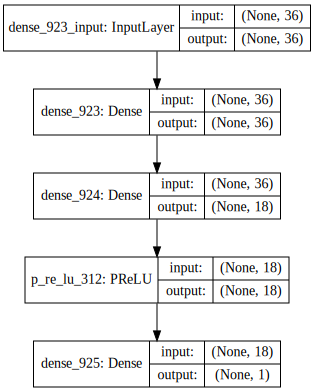

In [51]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(bestModel(), show_shapes = True).create(prog='dot', format='svg'))

In [54]:
df.values[:,0]

array(['Thierry Schang', 'Thierry Schang', 'Thierry Schang',
       'Thierry Schang', 'Thierry Schang', 'Bumsoo Kim', 'Bumsoo Kim',
       'Bumsoo Kim', 'Bumsoo Kim', 'Bumsoo Kim', 'Bumsoo Kim',
       'Bumsoo Kim', 'Stephanie Jacobs', 'Bumsoo Kim', 'Bumsoo Kim',
       'Stephanie Jacobs', 'Stephanie Jacobs', 'Bumsoo Kim', 'Bumsoo Kim',
       'Stephanie Jacobs', 'Bumsoo Kim', 'Stephanie Jacobs',
       'Arnaud Glatron', 'Bumsoo Kim', 'Arnaud Glatron', 'Bumsoo Kim',
       'Arnaud Glatron', 'Arnaud Glatron', 'Bumsoo Kim', 'Bumsoo Kim',
       'Bumsoo Kim', 'Arnaud Glatron', 'Jason Kim', 'Jason Kim',
       'Jason Kim', 'Jason Kim', 'David Barron', 'Allen Malaki',
       'Jason Kim', 'Stephen DiFranco', 'Allen Malaki', 'Jason Kim',
       'Taeyang Yoon', 'Jean-Claude Janqua', 'Taeyang Yoon',
       'Jean-Claude Janqua', 'Jean-Claude Janqua', 'Jean-Claude Janqua',
       'Taeyang Yoon', 'Taeyang Yoon', 'Jean-Claude Janqua',
       'Taeyang Yoon', 'John Schlesinger', 'John Schlesinger',
 

<center> Residual = Observed - predicted </center>



Red is our baseline model's residuals while green is our bestModel's.

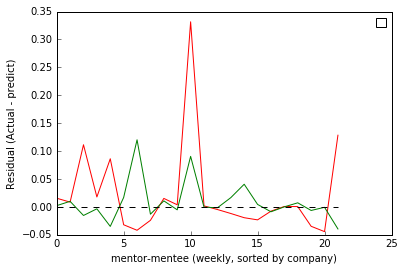

In [56]:
y1 = prediction_baseline
y2 = prediction_bestModel

x = range(len(prediction_bestModel))

y = Ytest



se1 = np.std(prediction_baseline)
se2 = np.std(prediction_bestModel)


fig, ax = plt.subplots()
ax.plot(x, (y-y1), 'r-', label = 'Residual')
ax.plot(x, (y-y2), 'g-', label = '3MC')

ax.plot(x, [0]*len(x), 'k--')
# ax.plot(x, y1 , 'k-', label = '3MC - 100 epochs')
ax.set_xlabel('mentor-mentee (weekly, sorted by company)')
ax.set_ylabel('Residual (Actual - predict)')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend(handles=[fig])

# display(fig)

plt.savefig("3MCResidual_final.png")
plt.show()

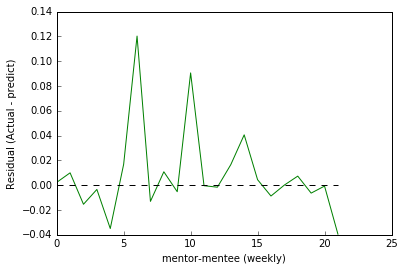

In [57]:
fig, ax = plt.subplots()
ax.plot(x, (y-y2) , 'g-', label = '3MC')
ax.plot(x, [0]*len(x), 'k--')
ax.set_xlabel('mentor-mentee (weekly)')
ax.set_ylabel('Residual (Actual - predict)')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("3MCResidualTunedModel_final.png")



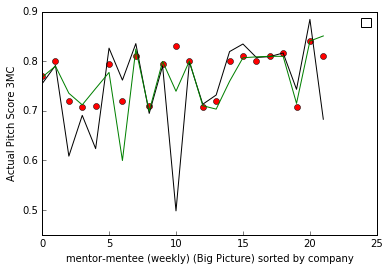

In [58]:
# Matplotlib and GGPlot
#You can display MatPlotLib and GGPlot objects in Python notebooks.
#Matplotlib objects can be viewed in Python notebooks using the display command.



y1 = prediction_baseline
y2 = prediction_bestModel

x = range(len(prediction_bestModel))

y = Ytest
se1 = np.std(prediction_baseline)
se2 = np.std(prediction_bestModel)


fig, ax = plt.subplots()
ax.plot(x, y, 'ro', label = 'actual data')

ax.plot(x, y1 , 'k-', label = '3MC')
# ax.plot(x, y1 +2*0.975*(se1) , 'k--', label = '3MC - SE')
# ax.plot(x, y1 -2*0.975*(se1) , 'k--', label = '3MC - SE')

ax.plot(x, y2, 'g-', label = '3MC')
# ax.plot(x, y2 +2*0.975*(se2) , 'g--', label = '3MC SE ')
# ax.plot(x, y2 -2*0.975*(se2) , 'g--', label = '3MC SE')

ax.set_xlabel('mentor-mentee (weekly) (Big Picture) sorted by company')
ax.set_ylabel('Actual Pitch Score 3MC')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend(handles=[fig])

# display(fig)
plt.savefig("3MC_BigPicture_final.png")



In [59]:
df[0:5]



,Mentor,Company,r,theta,Y
103,Thierry Schang,BluePrintLab,1.376972,46.286326,0.66
6,Thierry Schang,BluePrintLab,1.409992,44.900300,0.66
64,Thierry Schang,BluePrintLab,1.455233,43.151550,0.66
66,Thierry Schang,BluePrintLab,0.984023,37.702905,0.66
40,Thierry Schang,BluePrintLab,1.602774,46.224893,0.66


Simulation ends

In [60]:

z = dt.datetime.now()
print("%s/%s/%s %s:%s GMT" % (z.year, z.month, z.day, z.hour, z.minute))

2018/8/14 1:19 GMT


In [61]:
print((z-a).total_seconds()//60., "mins")

64.0 mins


# Appendix: Trying Other methods as benchmark


Random Forest and XGboost are two approaches that works excellent in Kaggle competition and generate excellent result with limited time. Random Forest is a ensembled learning of many decision trees. XGBoost (Extreme Gradient Boosting) is a Gradient boosting ensembled trees algorithm


For this reason, they are a good benchmark algorithm


We will be using sklearn's Randomforestregressor to see how we match against our 3MCNet


In [62]:
from sklearn.ensemble import RandomForestRegressor
seed = 123

Create a random forest with 1000 trees each has max depth of 20

In [63]:
rfmodel = RandomForestRegressor(n_estimators = 1000, max_depth = 20, 
                                  bootstrap = True, 
                                  criterion = "mse", 
                                  random_state = seed, verbose =1,
                                 warm_start = False, n_jobs = 1)

Model Fitting

In [64]:
rfmodel.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=123,
           verbose=1, warm_start=False)

MSE of random Forest

In [65]:
np.mean((rfmodel.predict(xtest)-ytest)**2)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


0.0010113553346395351

In [66]:
prediction_rfmodel = rfmodel.predict(xtest)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


# XGboost




In [67]:
import xgboost
from xgboost import XGBRegressor

Create XGBOOST model with L1 and L2 regulizers.

(We can also tune our paremeter with hperas, but it is out of scope of this report)

In [68]:
xgmodel = XGBRegressor(max_depth = 10,  reg_alpha=0.5, reg_lambda=0.5, n_jobs = 2)

Model fiting

In [69]:
xgmodel.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MSE of XGBoost

In [70]:
np.mean((xgmodel.predict(xtest)-ytest)**2)

0.00091877916661608355

In [71]:
prediction_xgboost = xgmodel.predict(xtest)

# Result

Plot our results and see how our basedline Neural Network and tuned Neural Network perform against our benchmarks (Random Forest and XGBoost)

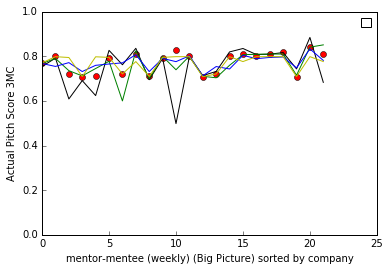

In [72]:



y1 = prediction_baseline
y2 = prediction_bestModel
y3 = prediction_rfmodel
y4 = prediction_xgboost


x = range(len(prediction_bestModel))

y_ = ytest #dataY
se1 = np.std(prediction_baseline)
se2 = np.std(prediction_bestModel)


fig, ax = plt.subplots()
ax.plot(x, y_, 'ro', label = 'actual data')

ax.plot(x, y1 , 'k-', label = '3MC - 100 epochs')
# ax.plot(x, y1 +2*0.975*(se1) , 'k--', label = '3MC - 100 epochs SE')
# ax.plot(x, y1 -2*0.975*(se1) , 'k--', label = '3MC - 100 epochs SE')

ax.plot(x, y2, 'g-', label = '3MC Cust -100 epochs')

# ax.plot(x, y2 +2*0.975*(se2) , 'g--', label = '3MC - 50 epochs SE(tuned)')
# ax.plot(x, y2 -2*0.975*(se2) , 'g--', label = '3MC - 50 epochs SE(tuned)')


ax.plot(x, y3, 'b-', label = '3MC Cust -100 epochs')

ax.plot(x, y4, 'y-', label = '3MC Cust -100 epochs')

ax.set_xlabel('mentor-mentee (weekly) (Big Picture) sorted by company')
ax.set_ylabel('Actual Pitch Score 3MC')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([0,1])

plt.legend(handles=[fig])

# display(fig)
plt.savefig("3MC_BigPicture_NN_RF_XGB_final.png")


You might wonder why we use 3MCNet over RandomForest (Ensembled learning method of decision trees) and XGBoost (Extreme Gradient Boosting).

Indeed this thought is logicial and right. However, as we have more data (column and row) and better data (in term of quality) when we progress, Neural Network will peform better. (NN is just better at scale and when many factors are needed to be considered.)

When the data we have is lacking, we can ensemble XGBoost and Random Forst with 3MCNet. This is a classic approach for data science as Ensembled method helps reduce overfitting and **generalize** nicely. 


Now Save everything in a environment with dill

# Insights we got from hyperparameter tuning (Simple GridSearchCV)

#### According to our hyperparamter tuning (we use GridSearch method, the model take 60 mins to run and train),  the grid search showed that Adadelta performs better than Stochastic Gradient Descent;Yet, when we introduce Mentor/Mentee, clasic Adam performs the best.


### Also, we further proved that our custom activation  
$${f(r,\theta)=2rsin(\theta−pi/2}$$
in the input layer (The objective function we derived) perform way better than other activation functions (like relu, prelu and etc.) when only r, theta are given. Likewise, when we introudce Mentor/Company, Neural net popular choice relu wins. 

## Improvement

In order to better incoperate Mentor/Company and r/theta, we should first train our r, theta network then feed into another neural nets with Mentor/Company data. This approach is very similar to Recurrent Neural Network (RNN).

Yet, We observed that huber loss is not very appreciated.

# More exicting details

Detailed result regarding about the hyper parameter tuning with hyperas(complicated architecture are developed), refer to **Keras-kopt-3MCNet-two-variables.ipynb** and **Keras-kopt-3MCNet-four-variables.ipynb**.

